<a href="https://colab.research.google.com/github/Basifrank/HNG12_Codes/blob/main/stage7_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Analysis of EU Email Core Network Data

## Importing and Installing Libraries

In [ ]:
!pip install nxviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
import requests
import networkx as nx
import nxviz as nv
from nxviz import annotate
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date
from pprint import pprint as pp
from itertools import combinations
import random
import pandas as pd
import numpy as np
from networkx.algorithms import community
from collections import Counter, defaultdict
import pickle

/usr/local/lib/python3.11/dist-packages/nxviz/__init__.py:33: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


## Connecting with Data and loading data into Graph Dataset

In [ ]:

# Load email interactions (edges list)
edges_file = "/content/drive/MyDrive/HNG INTERNSHIP/HNG 12/Stage 7/email-Eu-core.txt"


edges = []
with open(edges_file, 'r') as file:
    for line in file:
        source, target = map(int, line.strip().split())
        edges.append((source, target))
edges = pd.DataFrame(edges, columns=["source", "target"])


In [ ]:
edges.head()

source  target
0       0       1
1       2       3
2       2       4
3       5       6
4       5       7

In [ ]:
# Load department labels (node attributes)
labels_file = "/content/drive/MyDrive/HNG INTERNSHIP/HNG 12/Stage 7/email-Eu-core-department-labels.txt"
labels = []
with open(labels_file, 'r') as file:
    for line in file:
        node, department = map(int, line.strip().split())
        labels.append((node, department))
labels = pd.DataFrame(labels, columns=["node", "department"])

In [ ]:
labels.head()

node  department
0     0           1
1     1           1
2     2          21
3     3          21
4     4          21

In [ ]:

# Create a directed graph from the email interactions
G = nx.from_pandas_edgelist(edges, "source", "target", create_using=nx.DiGraph())

In [ ]:
 # Add department labels as node attributes
dept_dict = pd.Series(labels.department.values, index=labels.node).to_dict()
nx.set_node_attributes(G, dept_dict, "department")

## Basic Network Statistics

In [ ]:


print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Network Density:", nx.density(G))
print("Average Degree:", np.mean([d for _, d in G.degree()]))
print("Weakly Connected Components:", nx.number_weakly_connected_components(G))


Number of nodes: 1005
Number of edges: 25571
Network Density: 0.025342411448732432
Average Degree: 50.88756218905473
Weakly Connected Components: 20


In [ ]:
G.edges(data=True)

In [ ]:
G.nodes(data=True)

## Visualization and Insight

### Exploring initial dataset and making inference on the dataset

**Insights**

The middle part of your graph is highly connected, indicating that many nodes have multiple interactions.
This suggests a strong core-periphery structure where the core nodes may act as central hubs for communication.
Self-Loops (Circular Edges on Nodes):

The loops on individual nodes represent self-loops, meaning those nodes have interactions with themselves.
This is common in communication networks, where individuals might send emails to themselves (e.g., reminders, drafts, or forwarded messages).
Peripheral Nodes with Self-Loops:

The outermost nodes with self-loops seem to be less connected to the core.
These might represent isolated individuals who primarily interact with themselves or have limited connections.

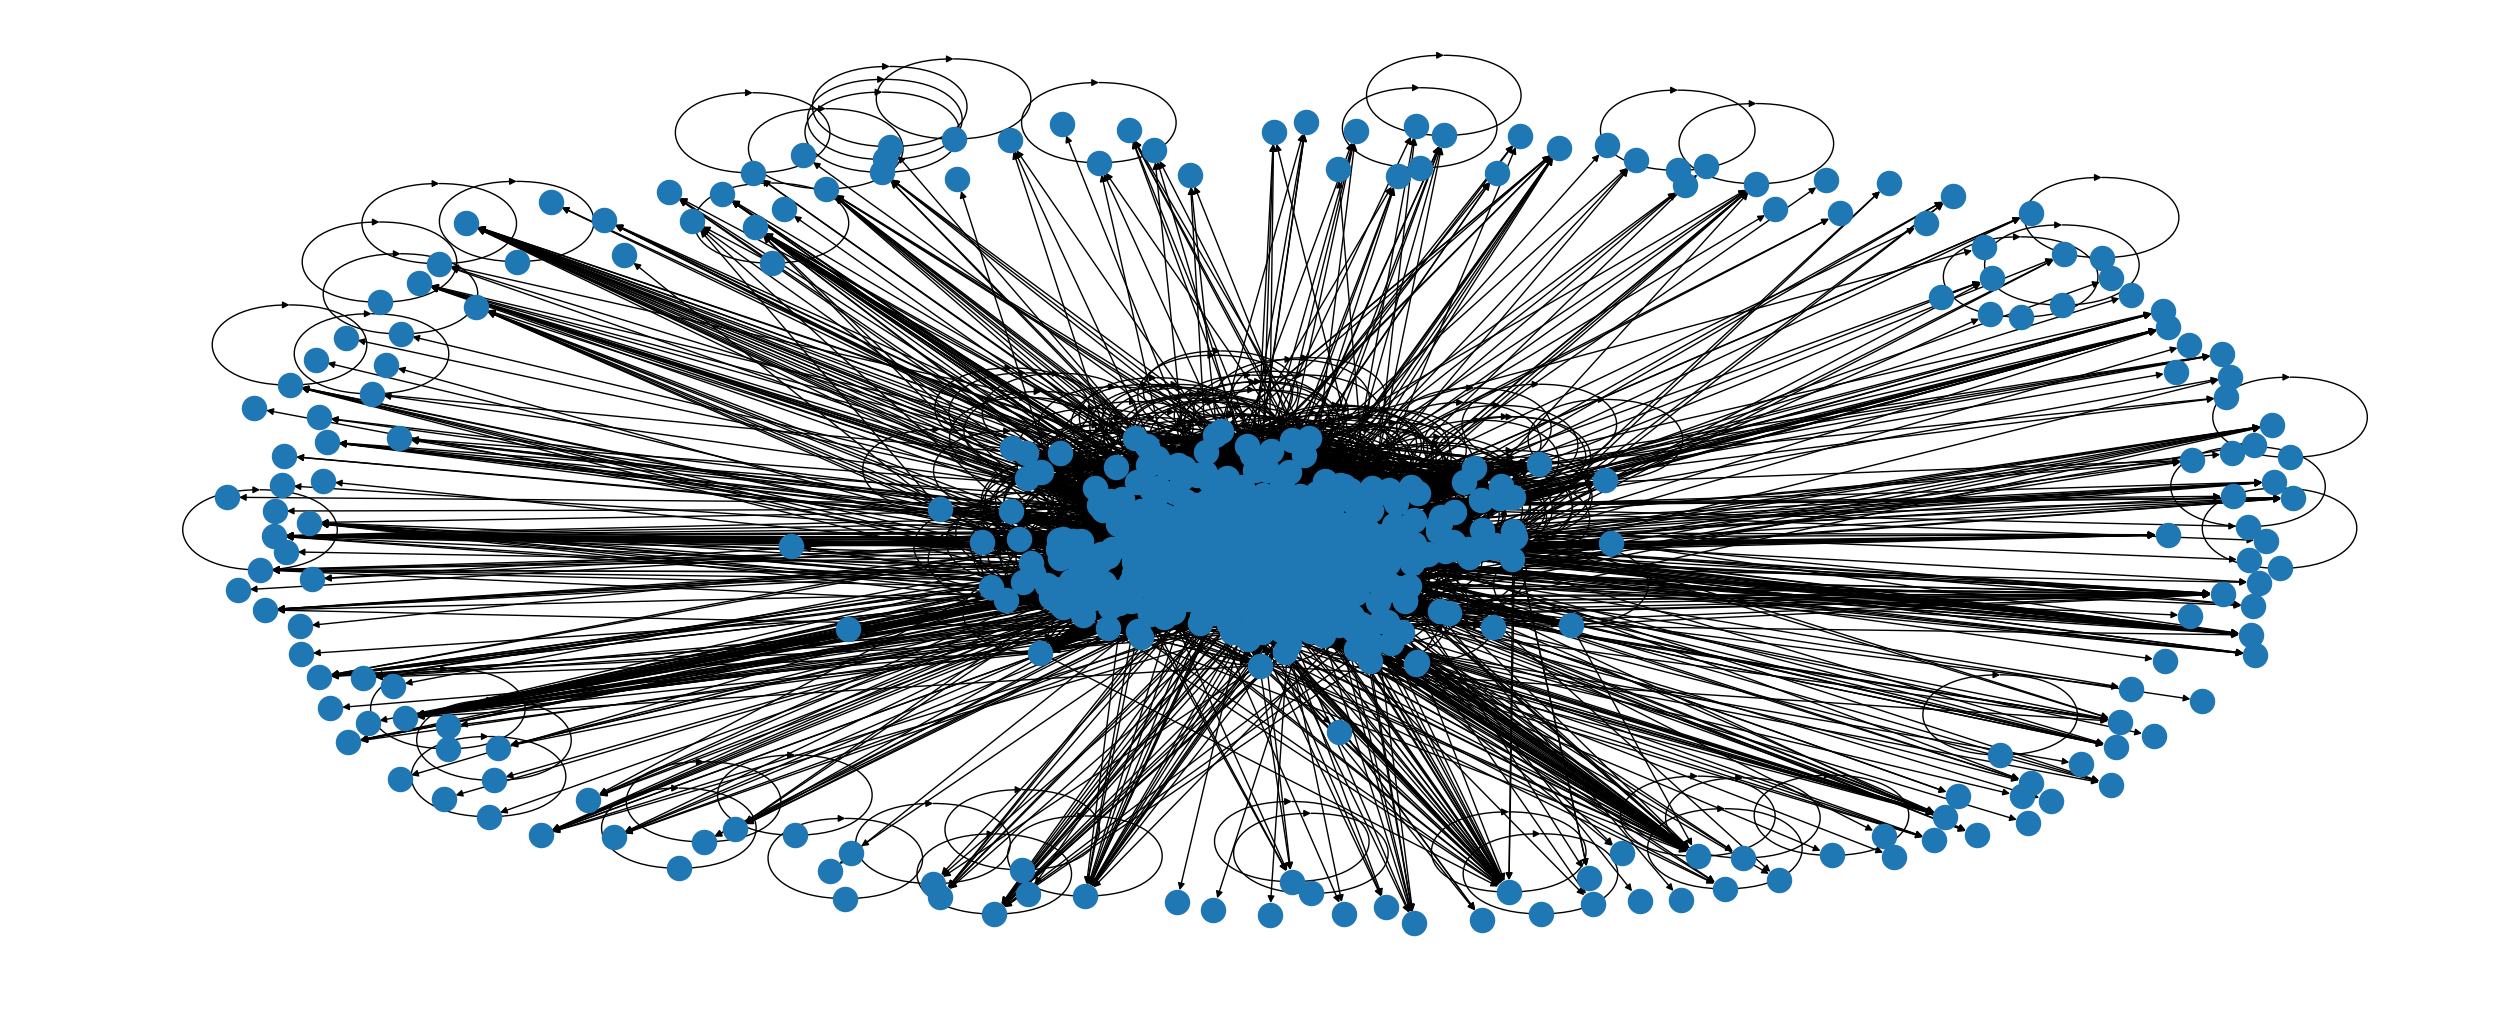

In [ ]:
plt.figure(figsize=(25, 10))
nx.draw(G)
plt.show()

**Additonal insight of mini-dataset**

From the below, it can seen some nodes have circular direction on itself

In [ ]:
T_sub = nx.DiGraph()
edges_from_T = [x for x in G.edges(list(range(50)), data=True) if x[0] in [1, 16, 18, 19, 28, 36, 37, 39, 42, 43, 45] if x[1] < 50]
T_sub.add_edges_from(edges_from_T)

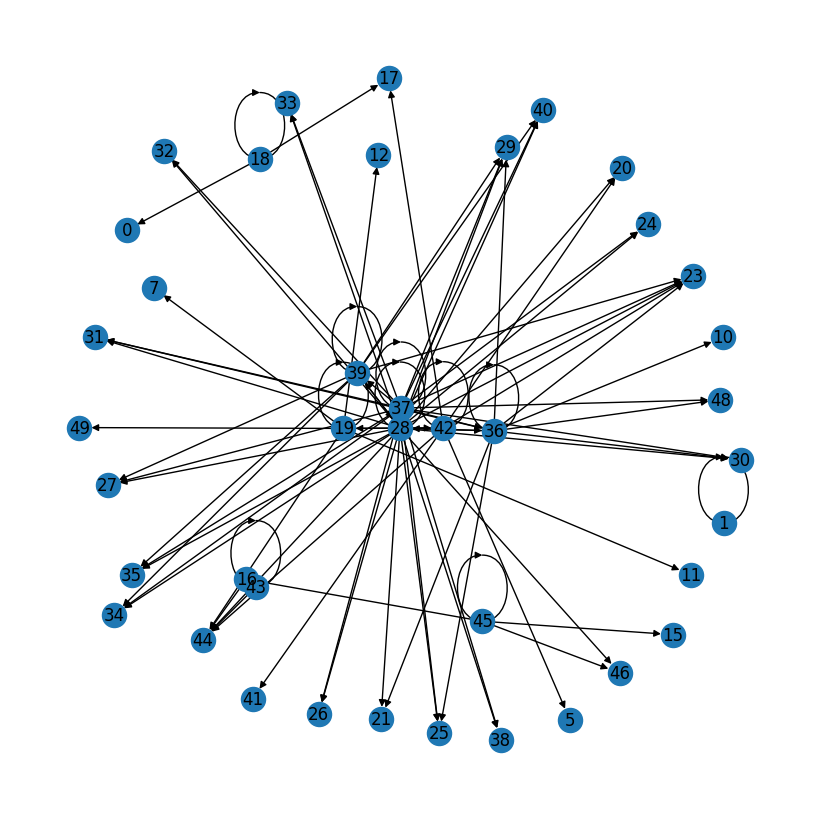

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(T_sub, with_labels=True)
plt.show()

### **Research Questions**

#### (1) **What proportion of emails in the network are self-loops?**
#### Checking whether there are self-loops in the graph



This examines how often users send emails to themselves compared to external communication.

Identifying nodes with a high number of self-loops may indicate individuals who frequently use emails for personal reminders or documentation.

Self-Sent Emails: Employees may send emails to themselves as drafts, reminders, or personal notes. Below code shows self-loop emails. It signifies that about 642 employees in the organization send mails to themselves. Most likely inform of drafts, reminders, or personal notes.

In [ ]:
num_self_loops = nx.number_of_selfloops(G)
print(f"Total number of self-loops: {num_self_loops}")

Total number of self-loops: 642


In [ ]:
self_loop_nodes = list(nx.nodes_with_selfloops(G))
print("Nodes with self-loops:", self_loop_nodes)


Nodes with self-loops: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 71, 73, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 154, 157, 158, 159, 160, 161, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 189, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 220, 222, 223, 224, 225, 227, 229, 230, 231, 232, 233, 234, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 249, 250, 251, 252, 25

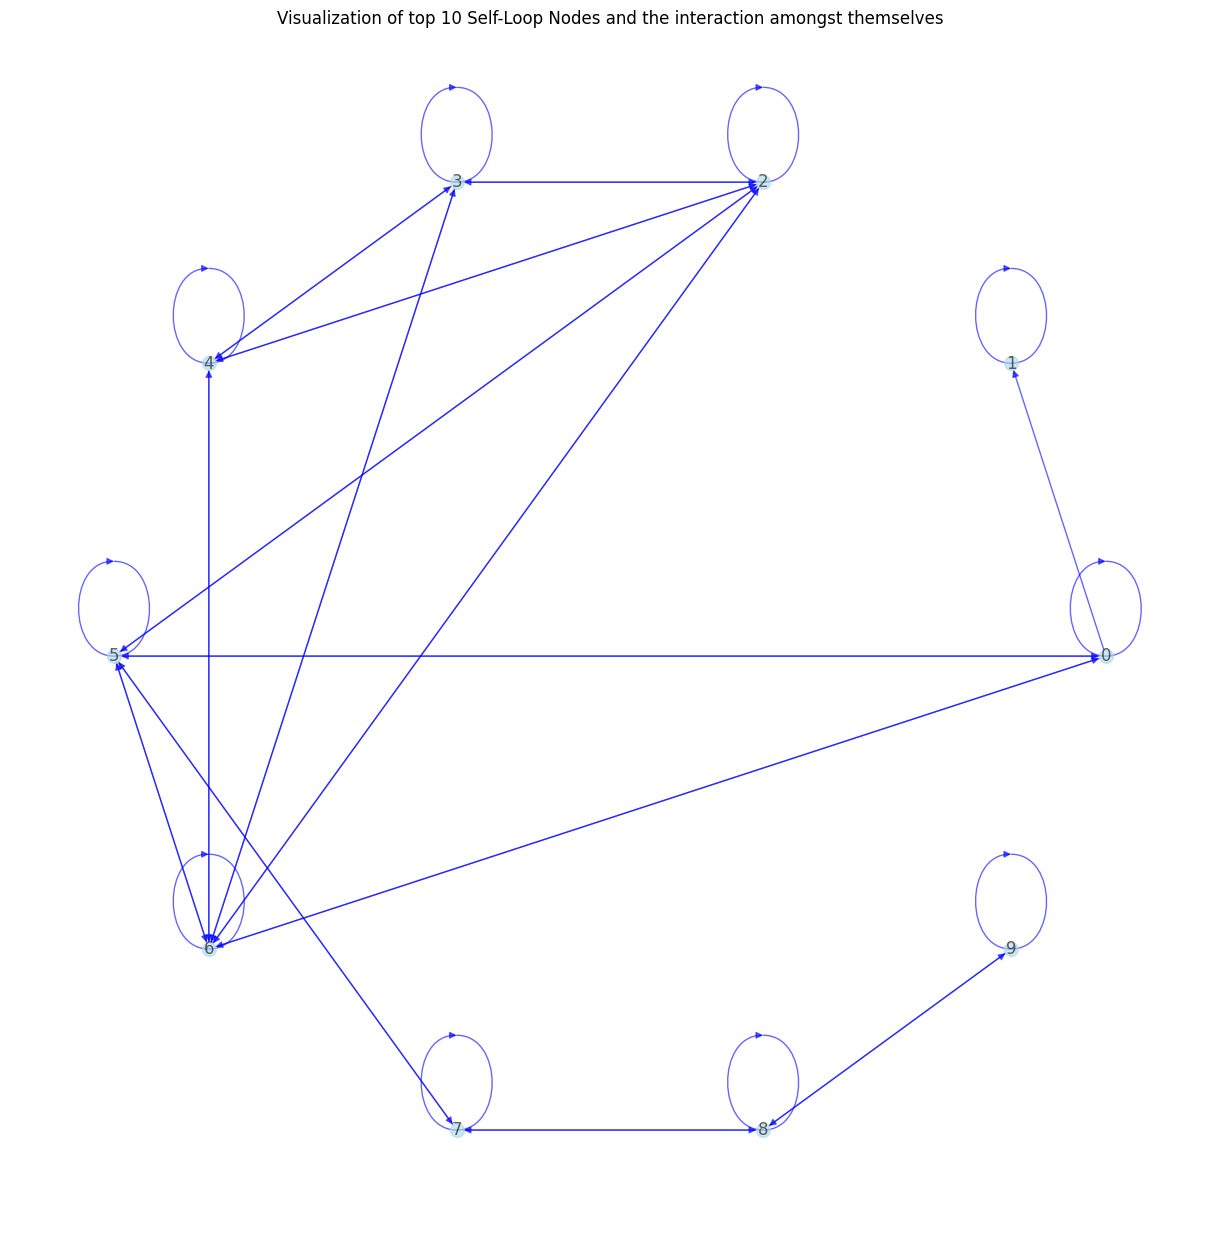

In [ ]:
# Create the subgraph G_self_loops
G_self_loops = G.subgraph(self_loop_nodes)
pos = nx.circular_layout(G_self_loops)
# pos = nx.spring_layout(G_self_loops, k=0.8, seed=42)  # Higher k spreads nodes apart
self_loop_counts = {node: len([1 for u, v in G.edges(node) if u == v == node]) for node in self_loop_nodes}

top_self_loop_nodes = sorted(self_loop_counts, key=self_loop_counts.get, reverse=True)[:10]  # Top 50
G_top_self_loops = G.subgraph(top_self_loop_nodes)

# Improve layout (circular layout for better visualization)
plt.figure(figsize=(12, 12))
pos_top_self_loops = nx.circular_layout(G_top_self_loops)  # Circular layout for top self-loops
# nx.draw(G_self_loops, pos, node_color="lightblue", node_size=100, edge_color="blue", alpha=0.6, with_labels=True)
nx.draw(G_top_self_loops, pos_top_self_loops, node_color="lightblue", node_size=100, edge_color="blue", alpha=0.6, with_labels=True) # Draw G_top_self_loops with its positions
plt.title("Visualization of top 10 Self-Loop Nodes and the interaction amongst themselves")
plt.show()

#### (2) **Are self-loops more common in highly connected individuals or isolated nodes?**

Here's the code to analyze whether self-loops are more common in highly connected individuals or isolated nodes. It calculates the degree of each node and compares it to the number of self-loops they have.

This code now analyzes and visualizes whether self-loops are more common in highly connected individuals or isolated nodes. It creates a histogram showing the degree distribution of self-loop nodes and plots a subgraph of self-loop nodes.

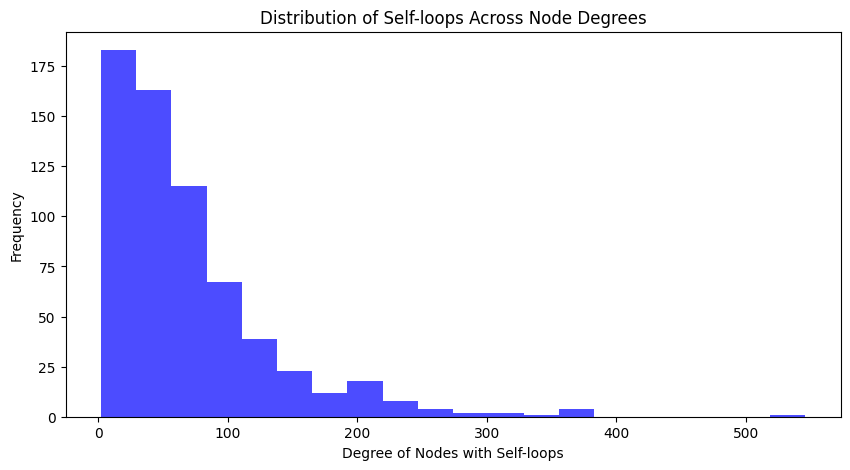

In [ ]:
# Self-loops Analysis ---
self_loops = [node for node in G.nodes() if G.has_edge(node, node)]
degree_of_self_loops = [G.degree(node) for node in self_loops]

plt.figure(figsize=(10, 5))
plt.hist(degree_of_self_loops, bins=20, color='blue', alpha=0.7)
plt.xlabel("Degree of Nodes with Self-loops")
plt.ylabel("Frequency")
plt.title("Distribution of Self-loops Across Node Degrees")
plt.show()

#### (3) **Which departments exhibit the highest frequency of self-loops?**
#### Are self-loops more common in certain departments?


The bar chart of the top 5 departments with self-loops directly answers this by showing which departments send the most emails to themselves.


The network graph of the top 5 self-looping departments reveals the structure of email exchanges within these departments and their relationships with each other.


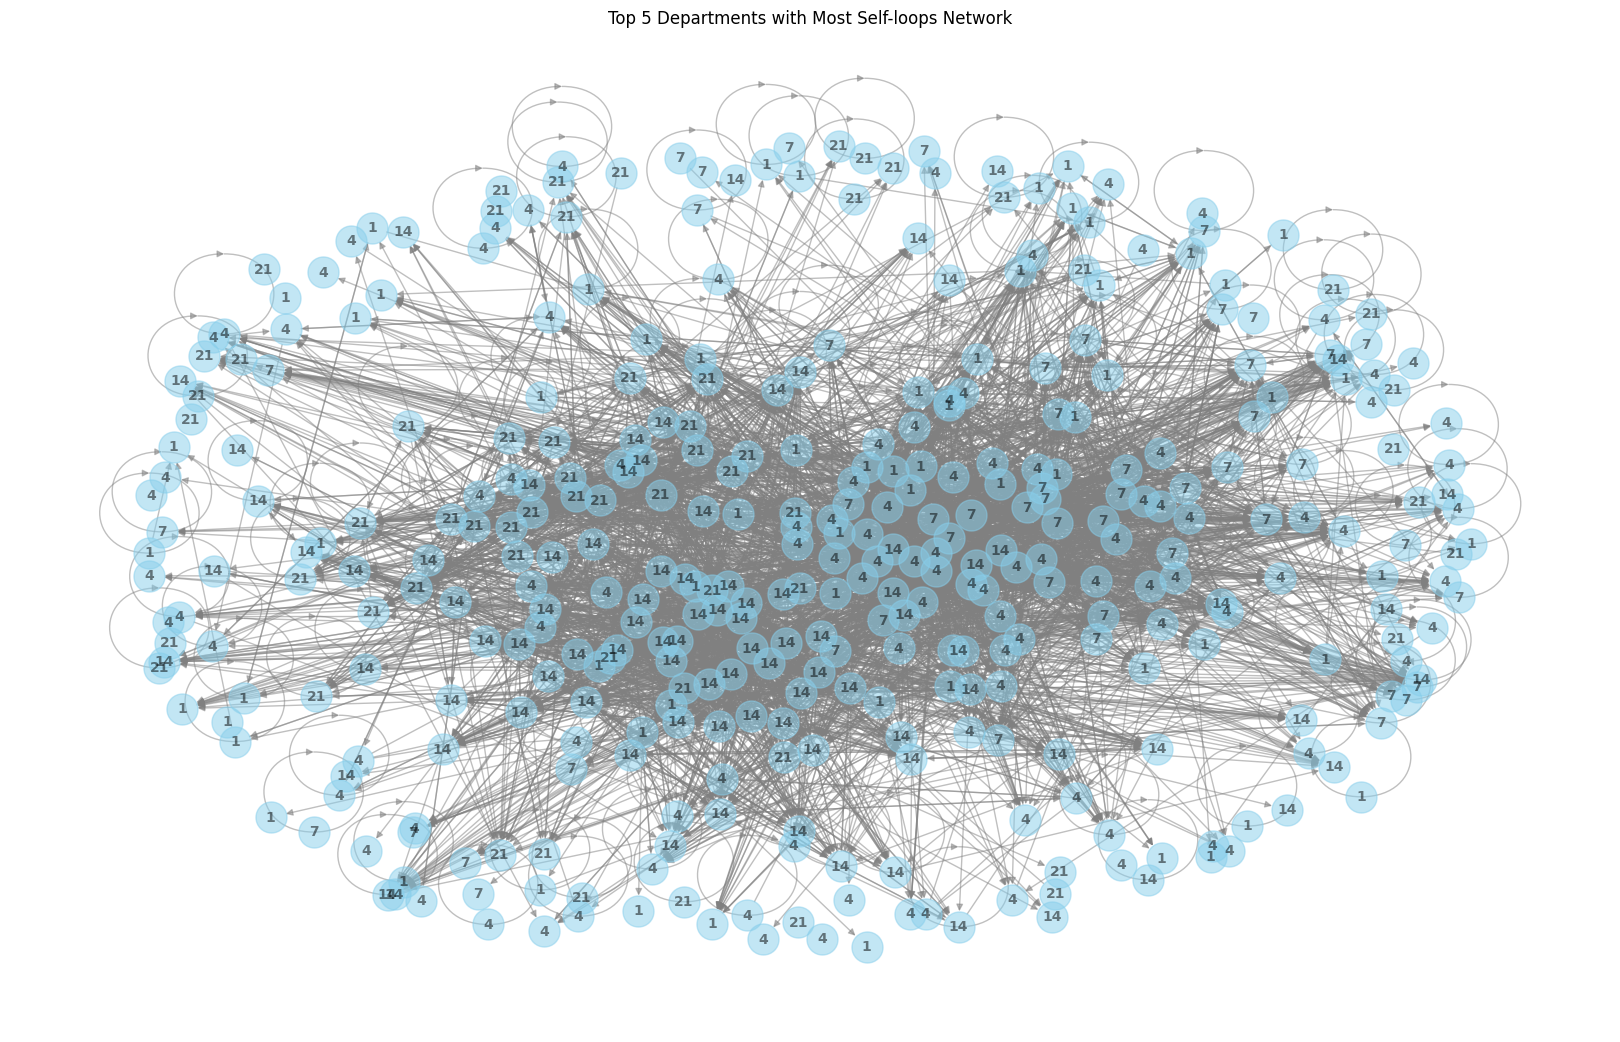

In [ ]:
# --- Top 5 Departments with Self-loops ---
self_loops = [node for node in G.nodes() if G.has_edge(node, node)]
self_loop_departments = [G.nodes[node]['department'] for node in self_loops]

# Count occurrences of each department
dept_self_loop_counts = pd.Series(self_loop_departments).value_counts()
top_5_depts = dept_self_loop_counts.head(5)

# Filter nodes belonging to top 5 self-loop departments
top_5_nodes = [node for node in G.nodes() if G.nodes[node]['department'] in top_5_depts.index]
G_top_self_loop = G.subgraph(top_5_nodes)

# Visualize with department labels
plt.figure(figsize=(16, 10))  # Increased size for better clarity
pos = nx.spring_layout(G_top_self_loop, seed=42, k=0.7)  # Adjusted layout for better spacing
nx.draw(G_top_self_loop, pos, node_size=500, edge_color="gray", alpha=0.5, with_labels=True,
        labels={node: G.nodes[node]['department'] for node in G_top_self_loop.nodes()},
        font_size=10, font_weight='bold', node_color="skyblue")
plt.title("Top 5 Departments with Most Self-loops Network")
plt.show()


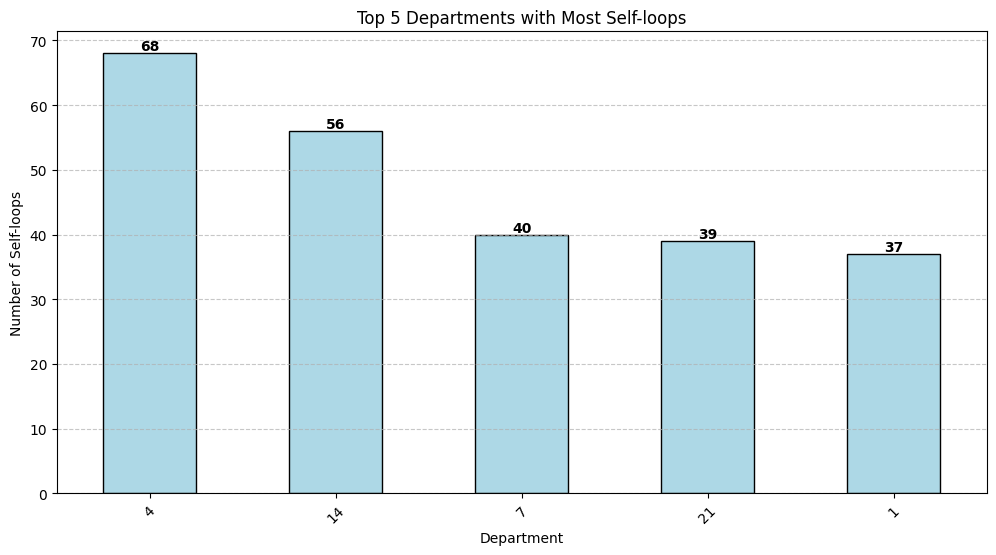

In [ ]:
# Plot bar chart of top 20 departments with self-loops
plt.figure(figsize=(12, 6))
ax = top_5_depts.plot(kind="bar", color="lightblue", edgecolor="black")

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.xlabel("Department")
plt.ylabel("Number of Self-loops")
plt.title("Top 5 Departments with Most Self-loops")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### (4) **Which departments communicate the most with each other via email?**



This helps identify strong inter-departmental collaborations or dependencies.

Insight: Identifies departments with the highest communication volume, highlighting strong inter-departmental collaborations or dependencies.

If a single department frequently appears in the top pairs, it might play a coordinating or administrative role.

Understanding whether email exchanges are concentrated among a few departments or more evenly distributed can provide insights into organizational silos or integration.


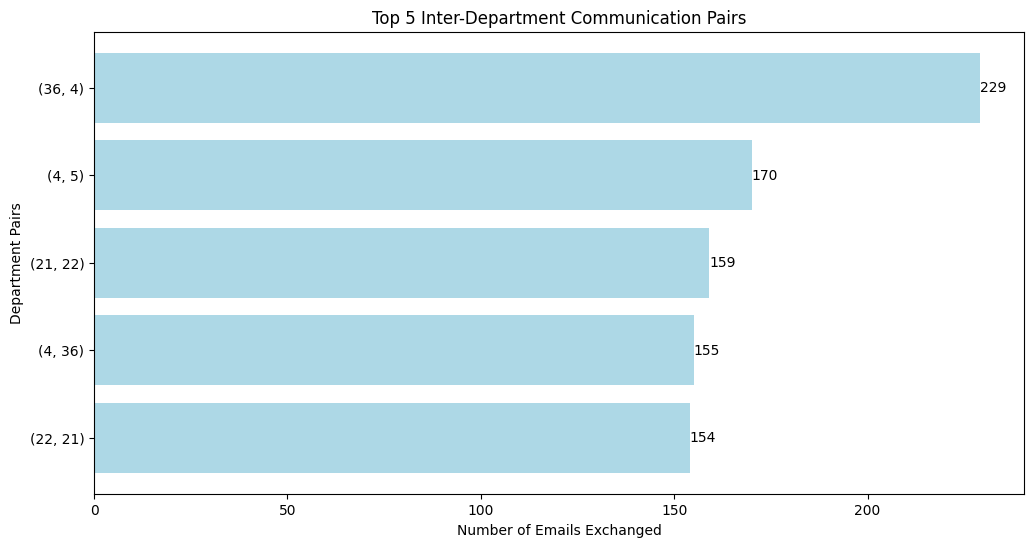

In [ ]:
#Top 5 Inter-Department Communication Pairs ---
inter_dept_edges = [(G.nodes[u]['department'], G.nodes[v]['department']) for u, v in G.edges if G.nodes[u]['department'] != G.nodes[v]['department']]

# Count occurrences of each inter-department communication pair
dept_pair_counts = Counter(inter_dept_edges)

# Get top 10 department pairs with highest communication
top_10_dept_pairs = dept_pair_counts.most_common(5)

# Convert to DataFrame for visualization
df_top_10 = pd.DataFrame(top_10_dept_pairs, columns=["Department Pair", "Email Count"])

# Bar chart for top 10 department communications
plt.figure(figsize=(12, 6))
bars = plt.barh(df_top_10["Department Pair"].astype(str), df_top_10["Email Count"], color="lightblue")
plt.xlabel("Number of Emails Exchanged")
plt.ylabel("Department Pairs")
plt.title("Top 5 Inter-Department Communication Pairs")

# Add values on bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{int(bar.get_width())}", va='center')

plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


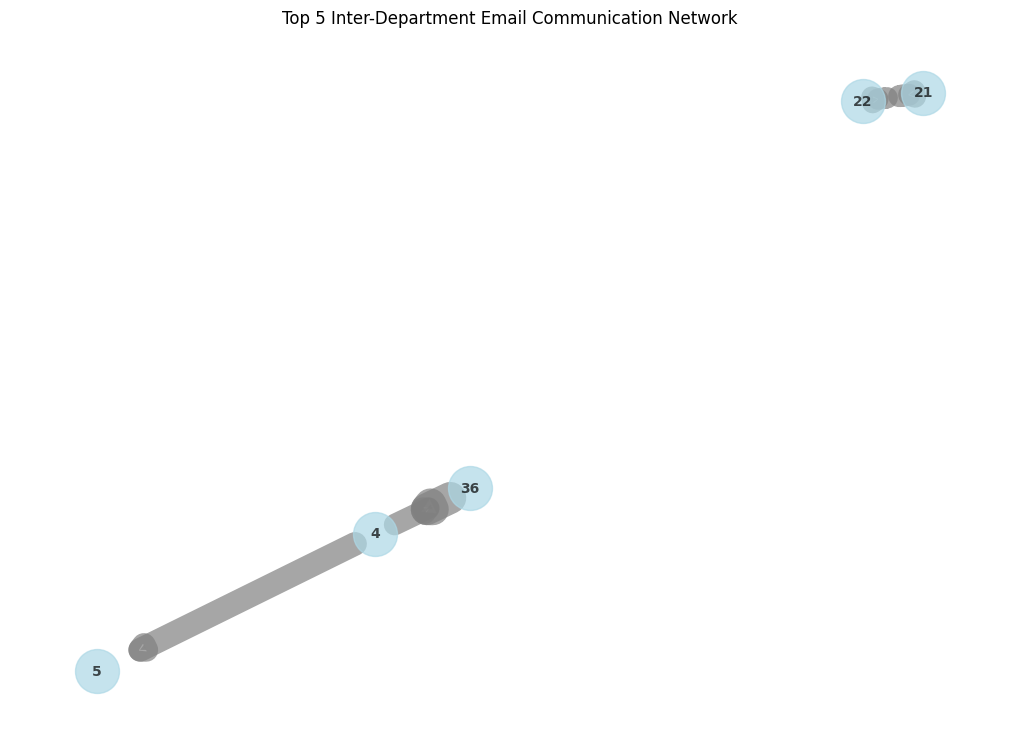

In [ ]:
# Visualization as Network Graph

G_top_inter_dept = nx.DiGraph()
for (dept1, dept2), count in top_10_dept_pairs:
    G_top_inter_dept.add_edge(dept1, dept2, weight=count)

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G_top_inter_dept, seed=42)
edge_widths = [G_top_inter_dept[u][v]['weight'] / 10 for u, v in G_top_inter_dept.edges()]  # Scale edge weights

nx.draw(G_top_inter_dept, pos, with_labels=True, node_size=1000, node_color="lightblue",
        edge_color="gray", width=edge_widths, font_size=10, font_weight="bold", alpha=0.7)

plt.title("Top 5 Inter-Department Email Communication Network")
plt.show()


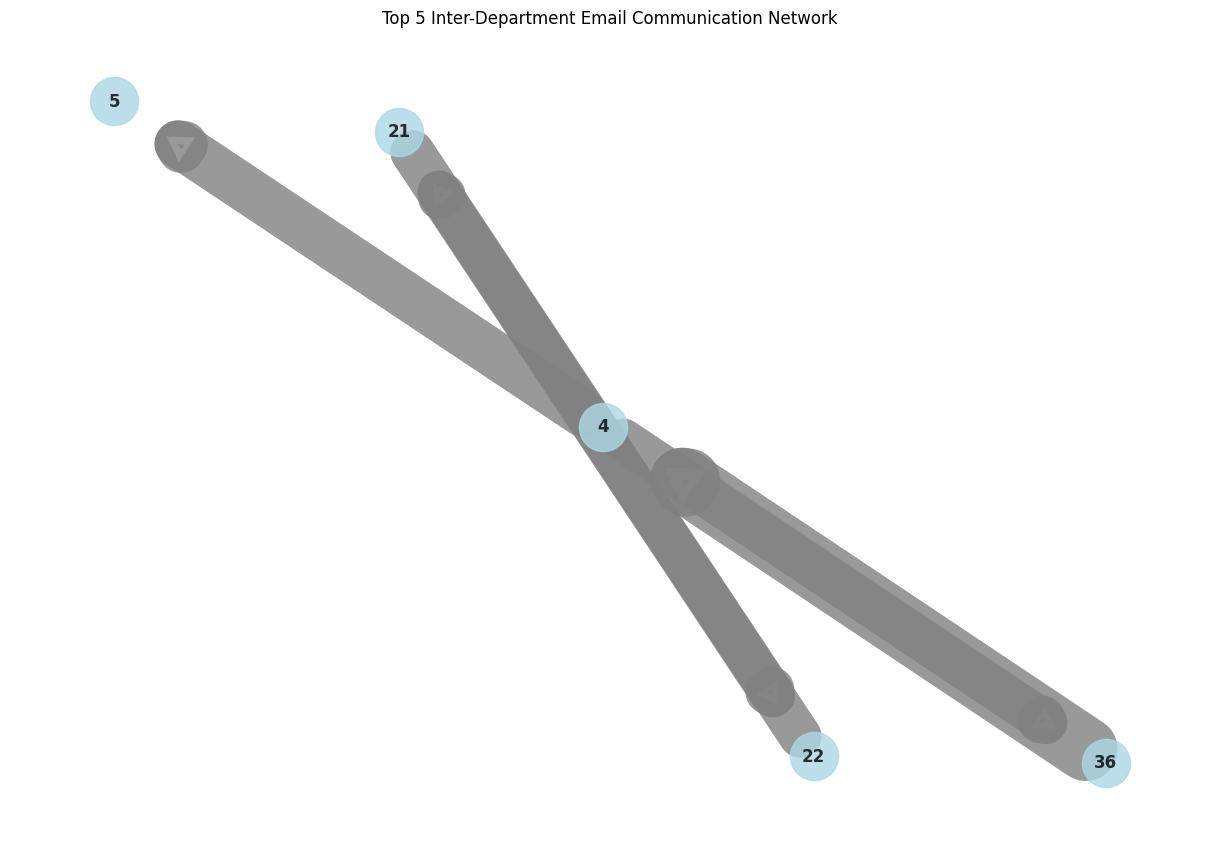

In [ ]:

# Create a subgraph with only top 5 inter-department pairs
G_top_inter_dept = nx.DiGraph()
for (dept1, dept2), count in top_10_dept_pairs:
    G_top_inter_dept.add_edge(dept1, dept2, weight=count)

plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G_top_inter_dept)  # Improved layout to reduce overlap
edge_widths = [G_top_inter_dept[u][v]['weight'] / 5 for u, v in G_top_inter_dept.edges()]  # Better scaling

nx.draw(G_top_inter_dept, pos, with_labels=True, node_size=1200, node_color="lightblue",
        edge_color="gray", width=edge_widths, font_size=12, font_weight="bold", alpha=0.8)

plt.title("Top 5 Inter-Department Email Communication Network")
plt.show()


#### (5)  **Which individuals (nodes) have the highest number of unique communication connections, and what role might they play in the network?**


**Insight**: Helps in identifying key influencers or central nodes within the organization who interact with the widest range of people.

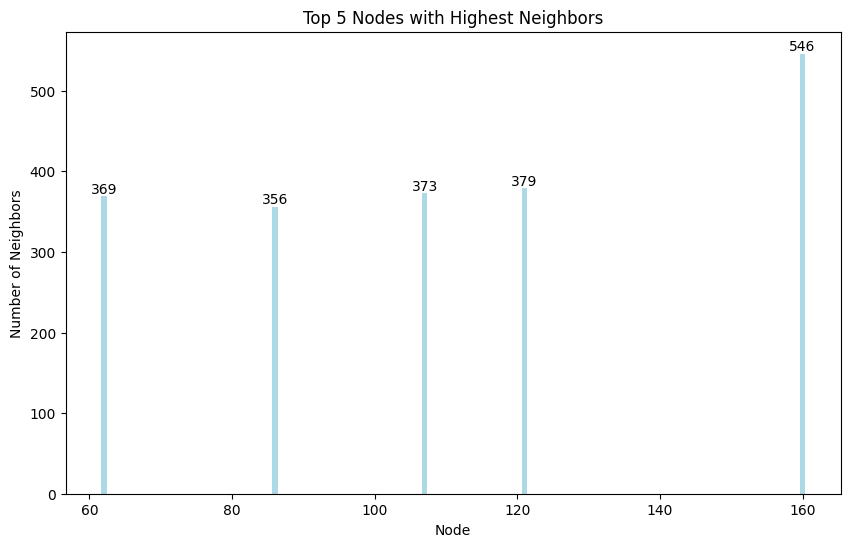

In [ ]:
# Get top 5 nodes by degree
node_degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]

# Bar chart for top 5 nodes
nodes, degrees = zip(*node_degrees)
plt.figure(figsize=(10, 6))
bars = plt.bar(nodes, degrees, color="lightblue")
plt.xlabel("Node")
plt.ylabel("Number of Neighbors")
plt.title("Top 5 Nodes with Highest Neighbors")

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

plt.show()


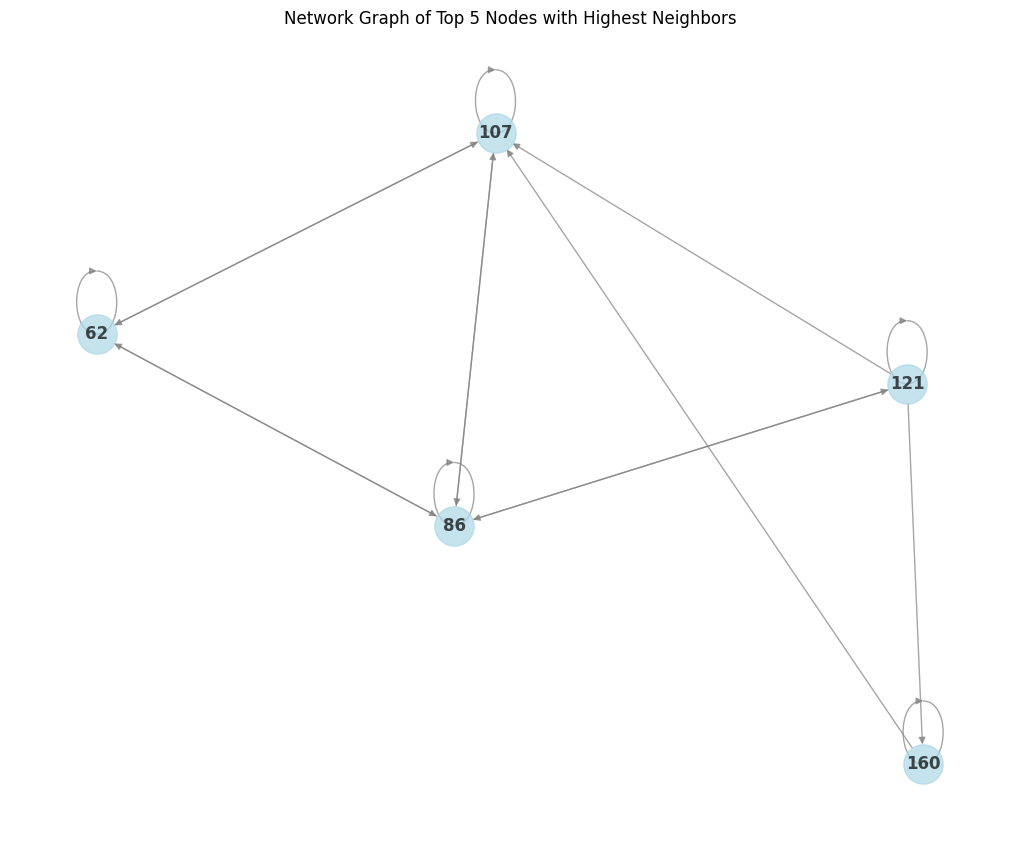

In [ ]:

# Network graph for top 5 nodes
G_top_nodes = G.subgraph(nodes)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_top_nodes)
nx.draw(G_top_nodes, pos, with_labels=True, node_size=800, node_color="lightblue", font_size=12, font_weight="bold", edge_color="gray", alpha=0.7)
plt.title("Network Graph of Top 5 Nodes with Highest Neighbors")
plt.show()


#### (6) **Which employees are the most active in inter-departmental communication?**

#### **Which Top 5 Employees Sending Most Emails Outside Their Department**

This helps identify key employees who facilitate cross-departmental collaboration, which could indicate leadership roles, project coordinators, or communication bottlenecks in the organization.

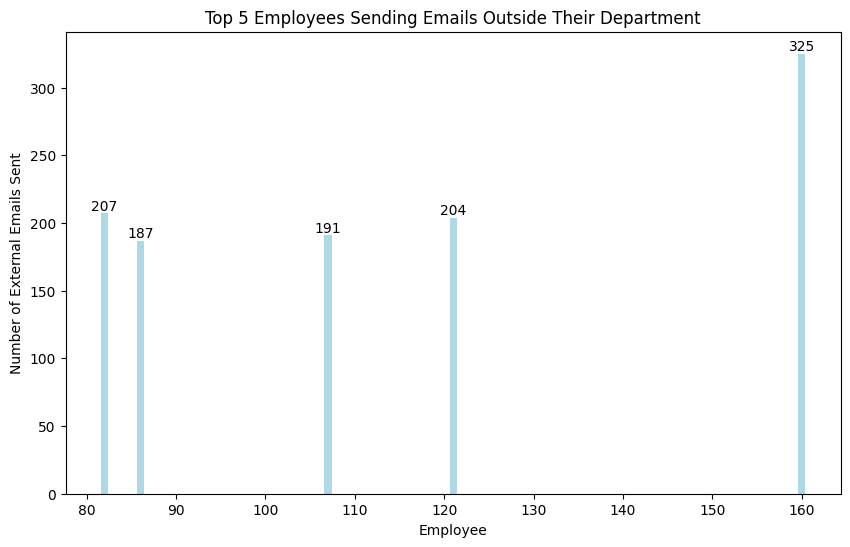

In [ ]:
external_emails = {node: 0 for node in G.nodes()}

for u, v in G.edges():
    if G.nodes[u]['department'] != G.nodes[v]['department']:
        external_emails[u] += 1

# Get top 5 employees who send the most emails to other departments
top_5_external_senders = sorted(external_emails.items(), key=lambda x: x[1], reverse=True)[:5]

# Bar chart for top 5 external email senders
employees, counts = zip(*top_5_external_senders)
plt.figure(figsize=(10, 6))
bars = plt.bar(employees, counts, color="lightblue")
plt.xlabel("Employee")
plt.ylabel("Number of External Emails Sent")
plt.title("Top 5 Employees Sending Emails Outside Their Department")

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

plt.show()


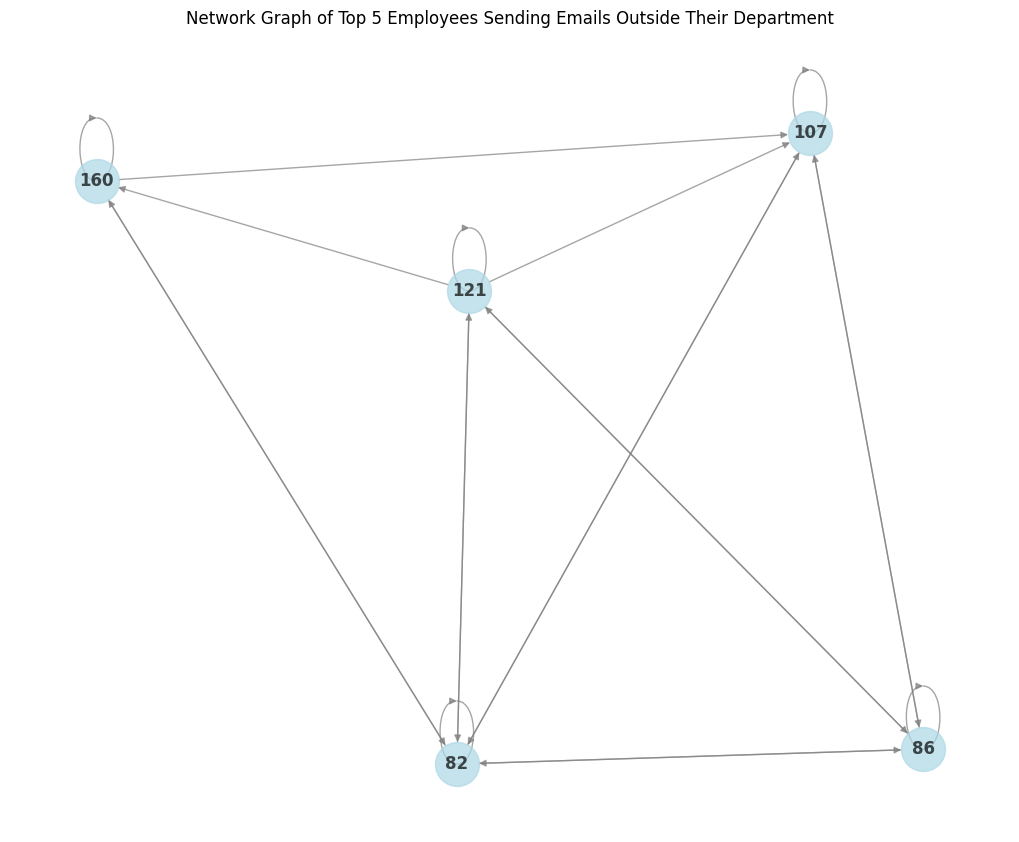

In [ ]:

# --- Network Graph for Top 5 External Email Senders ---
G_top_external_senders = G.subgraph(employees)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_top_external_senders, k=1.5)  # Better spacing
nx.draw(G_top_external_senders, pos, with_labels=True, node_size=1000, node_color="lightblue",
        font_size=12, font_weight="bold", edge_color="gray", alpha=0.7)
plt.title("Network Graph of Top 5 Employees Sending Emails Outside Their Department")
plt.show()

#### (7) **Which employees communicate most efficiently via email?**


**Top 5 Shortest and Longest Average Email Paths Between Employees **



The shortest path analysis identifies employees who can quickly reach others, indicating efficient communication.

The longest path analysis shows employees who may face obstacles or inefficiencies in communication.


In [ ]:

# --- Top 5 Shortest and Longest Average Email Paths Between Employees ---
shortest_paths = {}
for node in G.nodes():
    lengths = nx.single_source_shortest_path_length(G, node)
    if lengths:
        shortest_paths[node] = np.mean(list(lengths.values()))

# Sort by shortest and longest average path length
top_5_shortest_paths = sorted(shortest_paths.items(), key=lambda x: x[1])[:5]
top_5_longest_paths = sorted(shortest_paths.items(), key=lambda x: x[1], reverse=True)[:5]

# Convert to DataFrame
df_shortest_paths = pd.DataFrame(top_5_shortest_paths, columns=["Employee", "Average Shortest Path"])
df_longest_paths = pd.DataFrame(top_5_longest_paths, columns=["Employee", "Average Longest Path"])


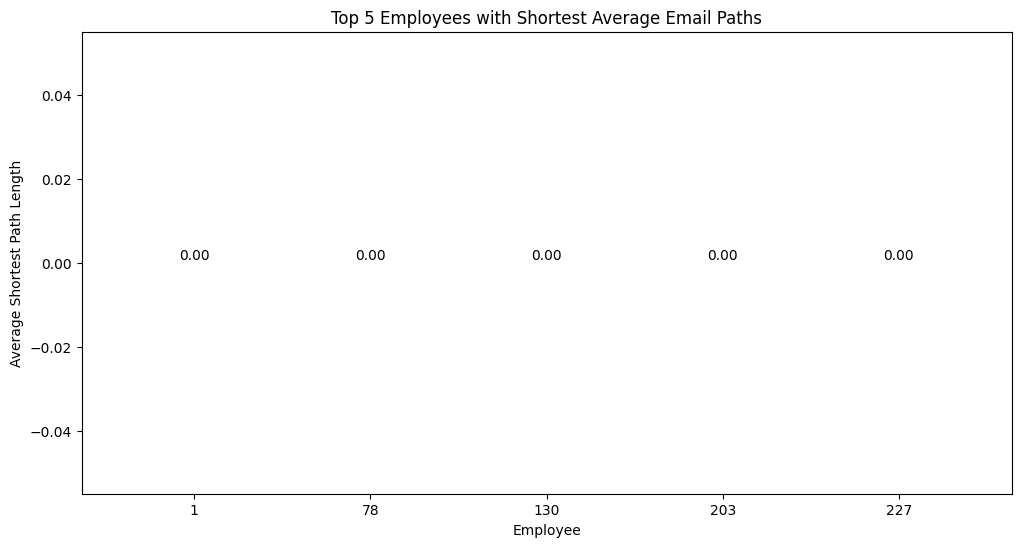

In [ ]:

# Bar chart for top 5 shortest average paths
plt.figure(figsize=(12, 6))
bars = plt.bar(df_shortest_paths["Employee"].astype(str), df_shortest_paths["Average Shortest Path"], color="lightblue")
plt.xlabel("Employee")
plt.ylabel("Average Shortest Path Length")
plt.title("Top 5 Employees with Shortest Average Email Paths")

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.show()


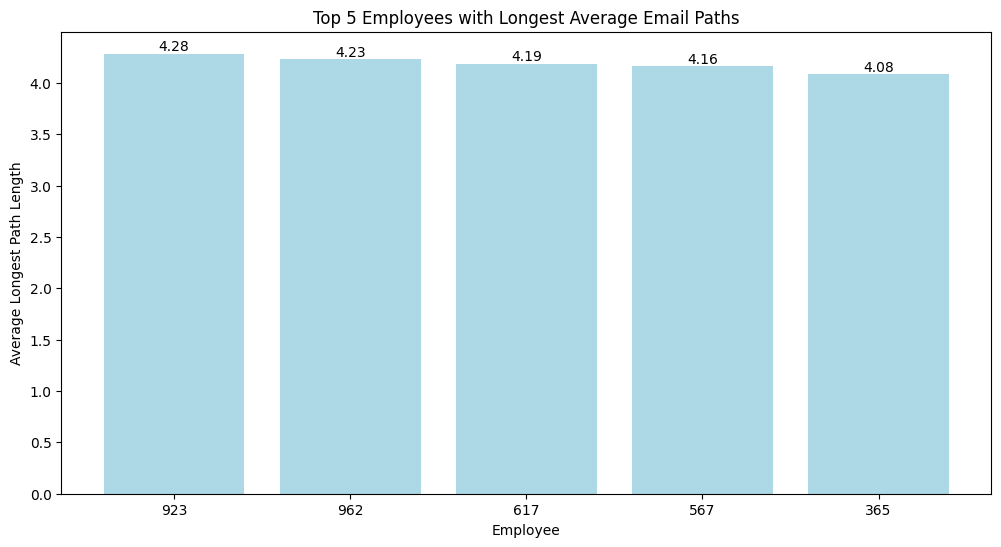

In [ ]:

# Bar chart for top 5 longest average paths
plt.figure(figsize=(12, 6))
bars = plt.bar(df_longest_paths["Employee"].astype(str), df_longest_paths["Average Longest Path"], color="lightblue")
plt.xlabel("Employee")
plt.ylabel("Average Longest Path Length")
plt.title("Top 5 Employees with Longest Average Email Paths")

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}", ha='center', va='bottom')

plt.show()

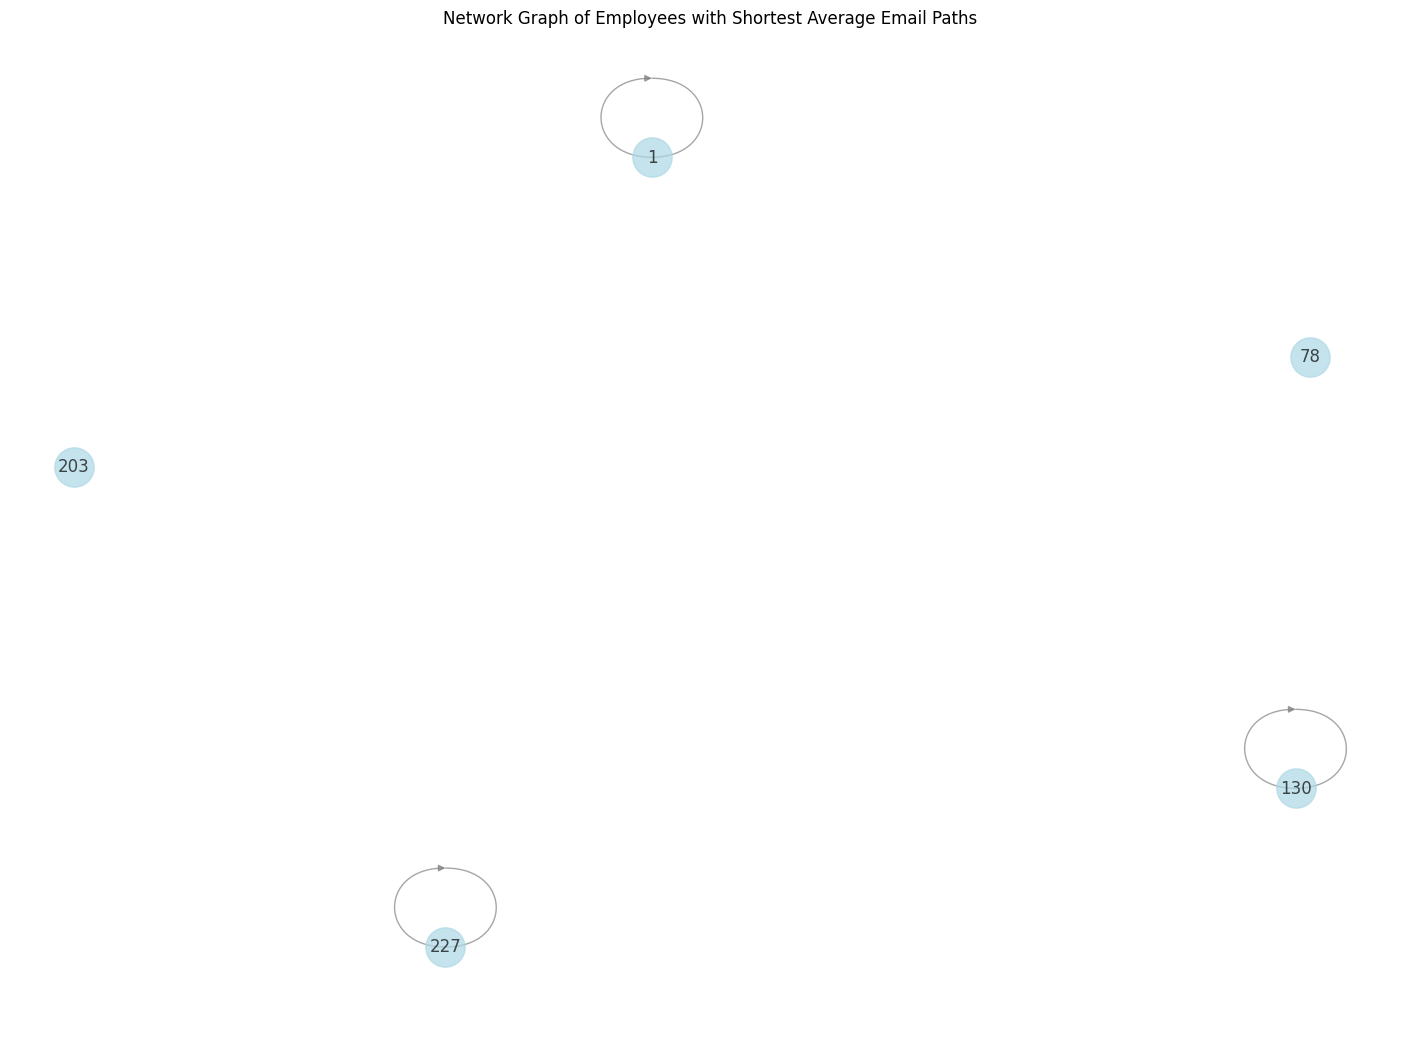

In [ ]:

# Network visualization for shortest paths
G_top_shortest_paths = G.subgraph([node for node, _ in top_5_shortest_paths])
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_top_shortest_paths, seed=42)
nx.draw(G_top_shortest_paths, pos, with_labels=True, node_size=800, node_color="lightblue", edge_color="gray", alpha=0.7)
plt.title("Network Graph of Employees with Shortest Average Email Paths")
plt.show()

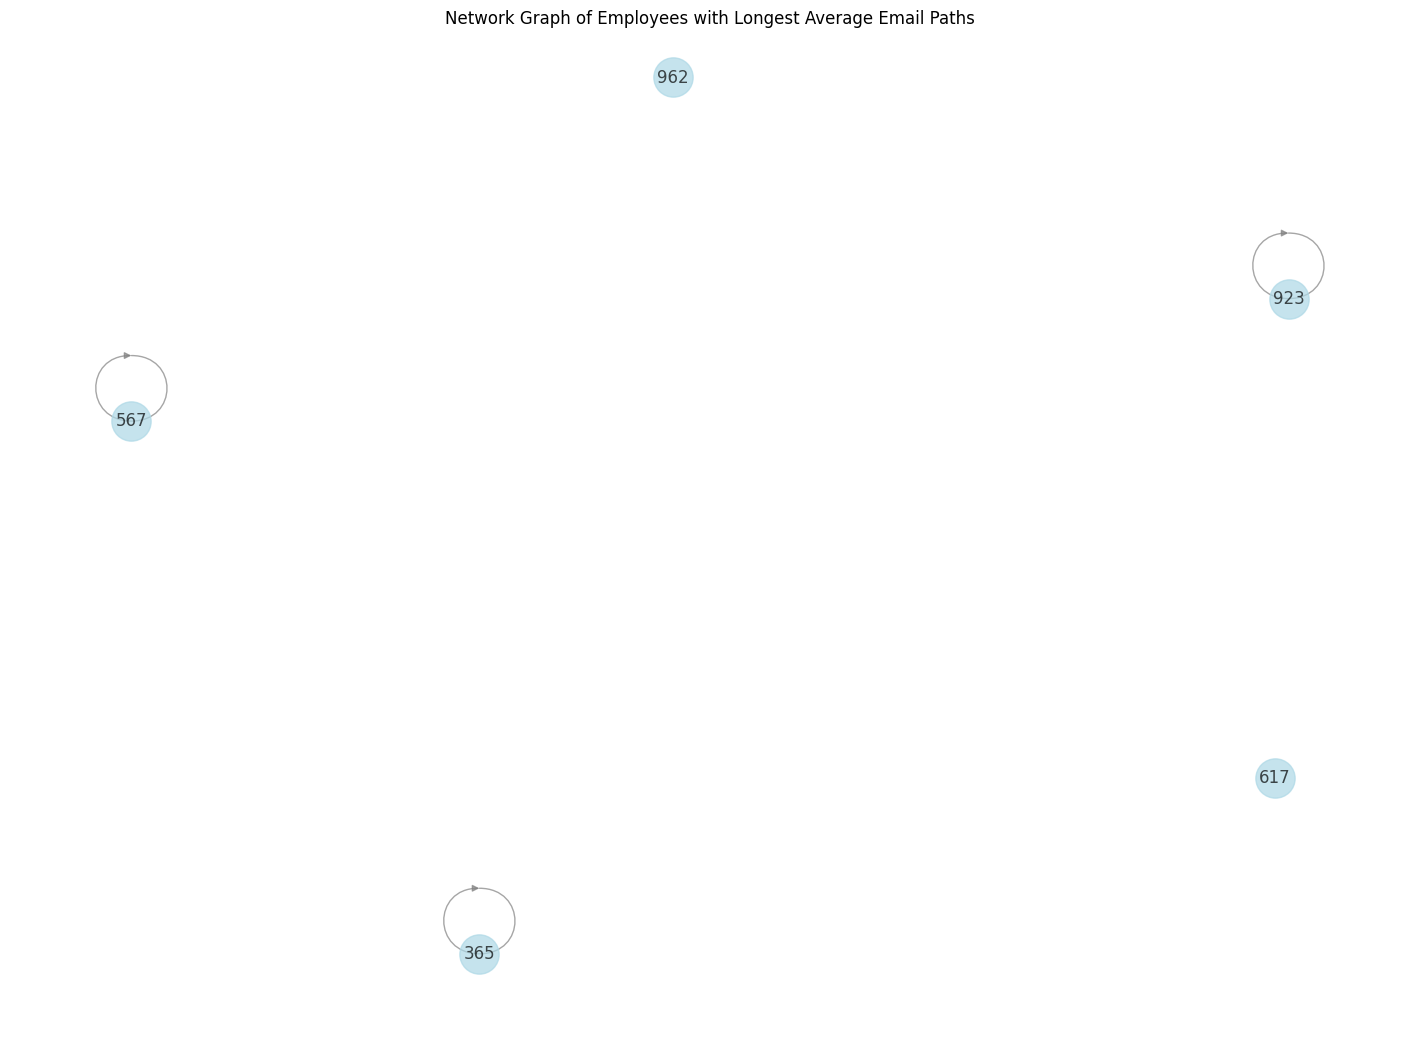

In [ ]:

# Network visualization for longest paths
G_top_longest_paths = G.subgraph([node for node, _ in top_5_longest_paths])
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G_top_longest_paths, seed=42)
nx.draw(G_top_longest_paths, pos, with_labels=True, node_size=800, node_color="lightblue", edge_color="gray", alpha=0.7)
plt.title("Network Graph of Employees with Longest Average Email Paths")
plt.show()


#### (8) **Which employee pairs have the shortest communication paths?**

**Top 5 Shortest and Longest Paths Between Employee Pairs**


Highlights strong direct or indirect connections that facilitate rapid information exchange.

Identifies potential communication bottlenecks that may need organizational improvement.




In [ ]:
all_shortest_paths = []
all_longest_paths = []
for u, paths in nx.all_pairs_shortest_path_length(G):  # Unpack into node and paths dict
    for v, path_length in paths.items():  # Iterate through target nodes and path lengths
        if u != v:  # Check if source and target are different
            all_shortest_paths.append(((u, v), path_length))
            all_longest_paths.append(((u, v), path_length))

In [ ]:
# Sort and get top 5 pairs
top_5_shortest_pairs = sorted(all_shortest_paths, key=lambda x: x[1])[:5]
top_5_longest_pairs = sorted(all_longest_paths, key=lambda x: x[1], reverse=True)[:5]

In [ ]:

# Convert to DataFrame
df_shortest_pairs = pd.DataFrame(top_5_shortest_pairs, columns=["Employee Pair", "Shortest Path Length"])
df_longest_pairs = pd.DataFrame(top_5_longest_pairs, columns=["Employee Pair", "Longest Path Length"])



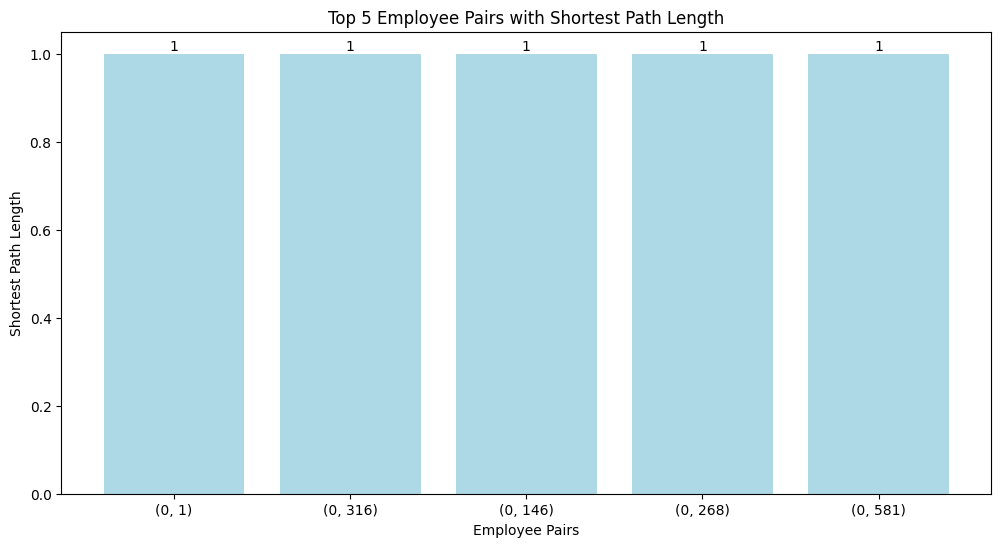

In [ ]:

# Bar charts for employee pairs
plt.figure(figsize=(12, 6))
bars = plt.bar(df_shortest_pairs["Employee Pair"].astype(str), df_shortest_pairs["Shortest Path Length"], color="lightblue")
plt.xlabel("Employee Pairs")
plt.ylabel("Shortest Path Length")
plt.title("Top 5 Employee Pairs with Shortest Path Length")

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(bar.get_height())}", ha='center', va='bottom')

plt.show()

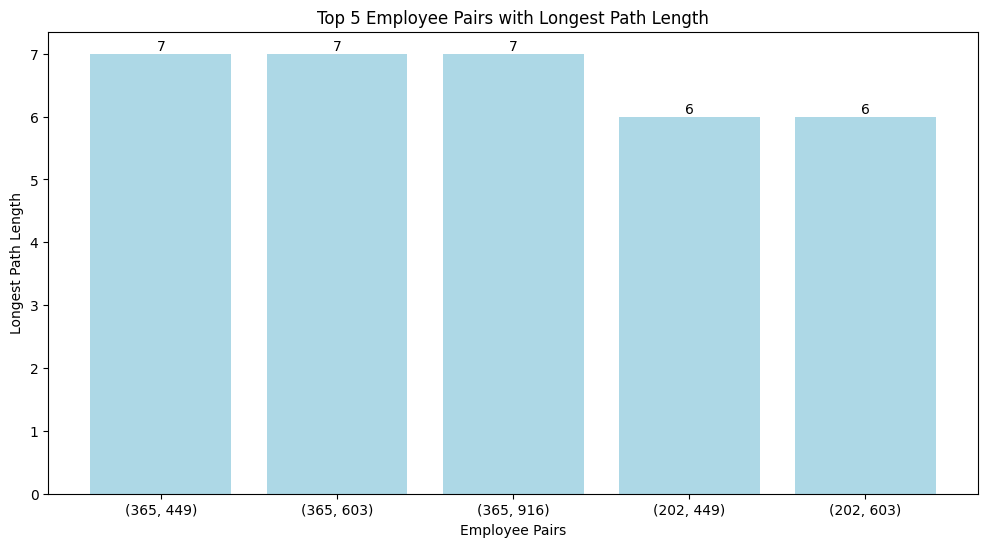

In [ ]:

plt.figure(figsize=(12, 6))
bars = plt.bar(df_longest_pairs["Employee Pair"].astype(str), df_longest_pairs["Longest Path Length"], color="lightblue")
plt.xlabel("Employee Pairs")
plt.ylabel("Longest Path Length")
plt.title("Top 5 Employee Pairs with Longest Path Length")

# Add values on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{int(bar.get_height())}", ha='center', va='bottom')

plt.show()


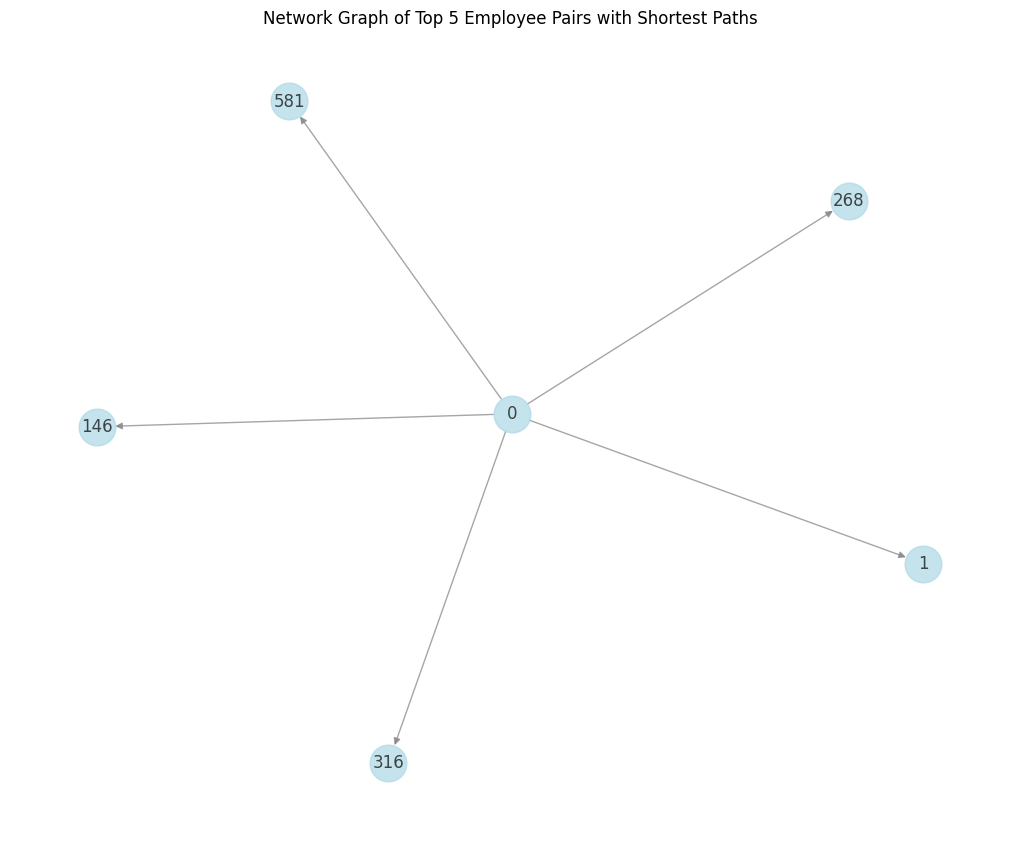

In [ ]:

# --- Network Graph for Shortest Paths ---
G_shortest_pairs = nx.DiGraph()
for (u, v), _ in top_5_shortest_pairs:
    G_shortest_pairs.add_edge(u, v)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_shortest_pairs, seed=42)
nx.draw(G_shortest_pairs, pos, with_labels=True, node_size=700, node_color="lightblue", edge_color="gray", alpha=0.7)
plt.title("Network Graph of Top 5 Employee Pairs with Shortest Paths")
plt.show()

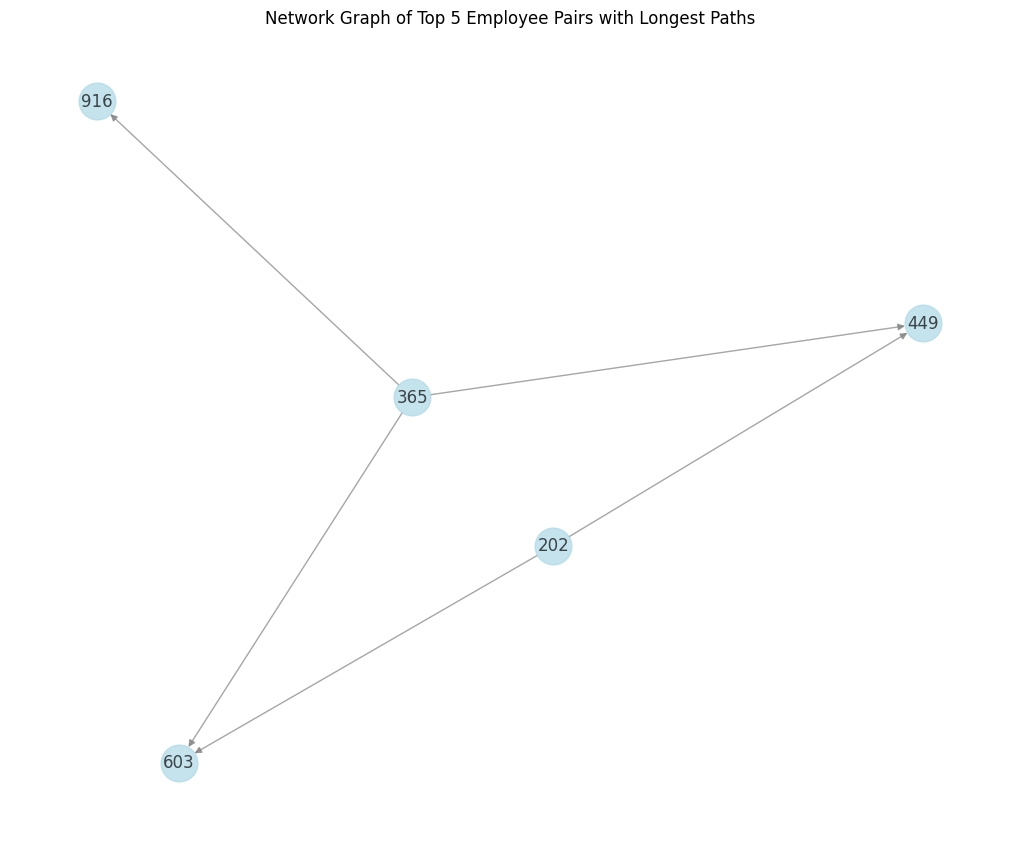

In [ ]:
# --- Network Graph for Longest Paths ---
G_longest_pairs = nx.DiGraph()
for (u, v), _ in top_5_longest_pairs:
    G_longest_pairs.add_edge(u, v)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_longest_pairs, seed=42)
nx.draw(G_longest_pairs, pos, with_labels=True, node_size=700, node_color="lightblue", edge_color="gray", alpha=0.7)
plt.title("Network Graph of Top 5 Employee Pairs with Longest Paths")
plt.show()